<a href="https://colab.research.google.com/github/carolcomputes/NGG6050/blob/main/09.22.2023HW%20Multiple%20comparisons%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise we will run through an example of correcting for multiple comparisons with both the Benjamini-Hochberg procedure and the more conservative Bonferroni correction.

First, simulate multiple (say, 1000) t-tests comparing two samples with equal means and standard deviations, and save the p-values. Obviously, at p<0.05 we expect that ~5% of the simulations to yield a "statistically significant" result (of rejecting the NULL hypothesis that the samples come from distributions with equal means).

Second, once you have the simulated p-values, apply both methods to address the multiple comparisons problem.

Third, set the sample 1 and sample 2 means to be 1 and 2 respectively, and re-run the exercise. What do you notice? What if you make the difference between means even greater?

In [1]:
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Set random seed for reproducibility
np.random.seed(0)

# Simulate 1000 t-tests with equal means and standard deviations
n_tests = 1000
p_values = []
sample_size = 100

for _ in range(n_tests):
    sample1 = np.random.normal(0, 1, sample_size)
    sample2 = np.random.normal(0, 1, sample_size)
    _, p_value = ttest_ind(sample1, sample2)
    p_values.append(p_value)

# Apply Benjamini-Hochberg procedure
rejected_bh, p_bh, _, _ = multipletests(p_values, method='fdr_bh', alpha=0.05)

# Apply Bonferroni correction
rejected_bonferroni = np.array(p_values) < 0.05 / n_tests

# Count the number of rejections for each method
num_rejections_bh = sum(rejected_bh)
num_rejections_bonferroni = sum(rejected_bonferroni)

print("Number of rejections (Benjamini-Hochberg):", num_rejections_bh)
print("Number of rejections (Bonferroni):", num_rejections_bonferroni)


Number of rejections (Benjamini-Hochberg): 0
Number of rejections (Bonferroni): 0


In [2]:
# Simulate 1000 t-tests with means 1 and 2
p_values_diff_means = []

for _ in range(n_tests):
    sample1 = np.random.normal(1, 1, sample_size)
    sample2 = np.random.normal(2, 1, sample_size)
    _, p_value = ttest_ind(sample1, sample2)
    p_values_diff_means.append(p_value)

# Apply Benjamini-Hochberg procedure
rejected_bh_diff_means, _, _, _ = multipletests(p_values_diff_means, method='fdr_bh', alpha=0.05)

# Apply Bonferroni correction
rejected_bonferroni_diff_means = np.array(p_values_diff_means) < 0.05 / n_tests

# Count the number of rejections for each method
num_rejections_bh_diff_means = sum(rejected_bh_diff_means)
num_rejections_bonferroni_diff_means = sum(rejected_bonferroni_diff_means)

print("Number of rejections (Benjamini-Hochberg, different means):", num_rejections_bh_diff_means)
print("Number of rejections (Bonferroni, different means):", num_rejections_bonferroni_diff_means)


Number of rejections (Benjamini-Hochberg, different means): 1000
Number of rejections (Bonferroni, different means): 997


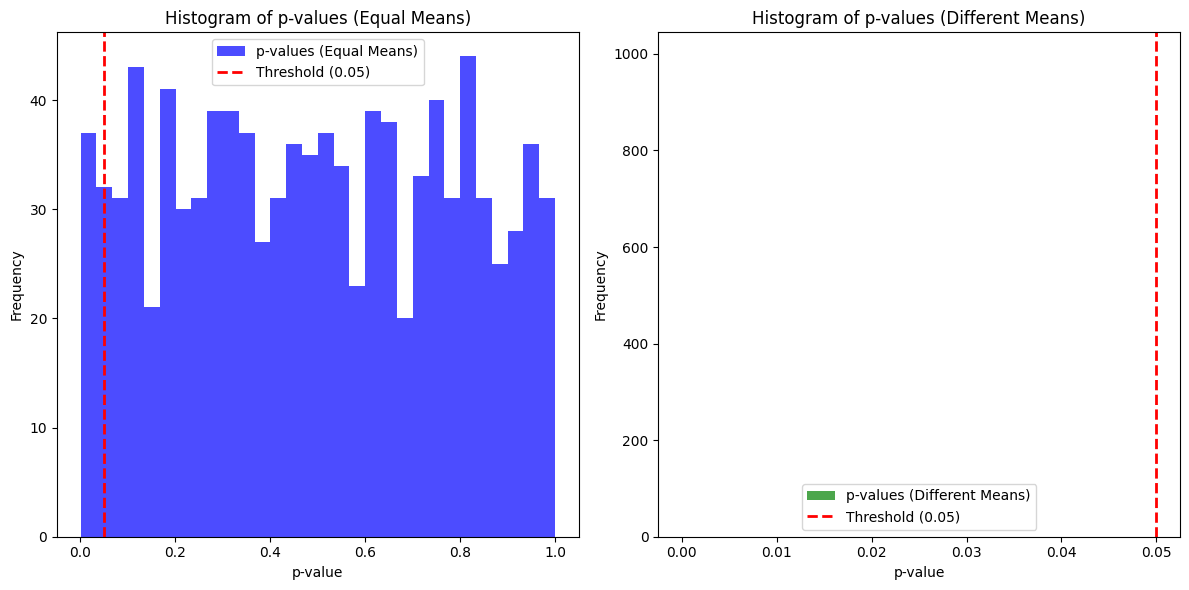

In [3]:
import matplotlib.pyplot as plt

# Create histograms for p-values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(p_values, bins=30, color='blue', alpha=0.7, label='p-values (Equal Means)')
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label='Threshold (0.05)')
plt.title('Histogram of p-values (Equal Means)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(p_values_diff_means, bins=30, color='green', alpha=0.7, label='p-values (Different Means)')
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=2, label='Threshold (0.05)')
plt.title('Histogram of p-values (Different Means)')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
